# Square API-and-SDK Lab: &nbsp;&nbsp; _Payments and Processing_

This lab challenge introduces you to a widely-used payments-processing API and SDK, from ***Square***
+ We will use the sandbox (for imagined transactions) and, at times, no API calls at all.
+ You'll create a business and business location...
+ You'll create transactions at your business...
+ You'll analyze the tradeoffs/savings from two different payment approaches for your business...
+ With reflection on the process as a whole. <br> <font size="-1">(and EC for creative data-visualization across multiple runs)</font>

<br>

[ Due by Sun. March 2 ] &nbsp;&nbsp; Setting up your Square developer account -- and taking a screenshot of a successful API call (using your authentication token) -- submit to Gradescope by 3/2.


<br>

[ Due by Sun. March 9 ] &nbsp;&nbsp;  Your copy of this notebook, its business, and analysis/reflection -- submit to Gradescope by 3/9. <br> <font size="-1">(Be sure to submit the <tt>.ipynb</tt> notebook file.)</font>

<br>

## Payment-project description and starter notebook

This is the notebook from our computing-themed Payments day... &nbsp;&nbsp; <font size="-2">(Feb. 25, 2025)</font>

In [ ]:
print("Our Business: Coffee Time!     (Our Consultancy: Pay Up...)")

### <font color="DodgerBlue">Payments: &nbsp; _Project Description_</font>

This is at the bottom of this notebook, as well.

Examples from here to the end will walk you through getting started. Your task is to, **first**, get those payment-simulations to work, for your Square business (and your Square access token)...

**Then**, add a comparative analysis between two types - and costs - of payment-making, either from one of these four possible sets of alternatives, or from a contrast (pair of alternatives) of your own design.

<br>
<hr>
<br>


#### <font color="Coral"><b>HW Tasks</b></font>: &nbsp;&nbsp;  <font size="-1">details for this payments hw...</font>

1. Make sure the analysis cells (below) are working for you... _Then_,
1. Choose an analysis to undertake. It can be one of our four suggested ones or one of your own:
   + <font color="DodgerBlue"><b>the "CFF" program</b></font>: _How much would the Merchant gain if it created a CFF program where one person (the CFF) paid for all of their friends each time, resulting in fewer charges?_ (and how much could be passed along to the CFF customer?)
      + You'll have to include in the payment - perhaps in the _Notes_ field - ***how many*** people each CFF paid for, each time, and use that value to compute the savings...
   + <font color="DodgerBlue"><b>the "CoffeeCash" program</b></font>: _How much would the Merchant gain if it could consolidate all of the orders from a single customer over the course of, say, a week?_ This also would result in fewer charges. (Part of this could be passed along, in theory...)
      + Here, Square will compute how much it would have charged the Merchant... and you'll compute the lower amount _after_ consolidation.
   + <font color="DodgerBlue"><b>the pitch for the _Merchant_ to join "Cube"</b></font>: &nbsp; Cube is an _imagined_ variant of Square that uses FedNow instead of Credit Cards. How much would the Merchant save with Cube?
      + Here, just use the nominal amounts of FedNow vs Square's charges. [Here is the FedNow Fee Schedule](https://www.frbservices.org/resources/fees/fednow-2025). (The top line is the one to use. The $25/month is waived this year.)
   + <font color="DodgerBlue"><b>the pitch for Square to _become_ "Cube"</b></font>: &nbsp; As a consultant, you are considering pitching that Square itself roll out a new premium brand, named _Cube_ &nbsp; (perhaps as a new "dimension" in payment-processing.) It uses FedNow instead of Credit Cards. How much would **Square** benefit in this case?
      + Just use the nominal amounts for FedNow vs CCards, for this hw...
      + This is <u>not</u> the same as the previous one! This one compares FedNow vs CCards, instead of FedNow vs Square! (As a result, this one's a bit more "real" ... if only a bit!)
   + <font color="DodgerBlue"><b>Other payment ideas?</b></font> &nbsp; ***Great!*** &nbsp; Feel free to use your own idea here, as long as it compares two real, or real-ish, payment approaches. Os, save them as part of your business-creation project at course's end.
1. Change the simulation to match your business's details 😀  You can stick with coffee - or choose another realm.
1. Change the simulation so that you're comparing two different approaches to handling payments.
1. Be sure to run small-as-possible tests to make sure things work well
   + Debug as needed -- Remember, debug locally and only use the real requests when it seems entirely debugged...
1. Live-test your shop's "bustle," perhaps looping over five payments.
1. Then, grab those last five payments from Square's API.
1. **Analyze** these five, prototyping and debugging your analysis
1. Through that analysis, compare the costs of the two payment approaches you're using.
1. Then, try the whole workflow for a larger set of new payments, perhaps a few dozen? 42? 100?
   + No need for more than this, unless you'd like to...
1. Finally, create a short write up with
   + your choice of payment-approaches to analyze (and your choice of business, if you changed it from coffee 😀)
   + note any API customizations you needed to investigate the business-intervention
     + For example, the CFF requires an additional piece of information: how many people the purchaser was covering
     + There is plenty of freedom here, and not every approach needs extra info
   + include the results of your analysis
   + are there other variations (of the comparison you made) worth noting -- what are the tradeoffs? It doesn't need to be a market-winning idea or even a reasonable idea, just an idea...
     + This might seem unneeded, but it's often helpful, even if silly, obvious, or outlandish. <br> <font size="-1">(We all -- rightly -- like making decisions within a "trade-off space.")</font>

<font color="DodgerBlue"><b>EC #1</b></font> &nbsp; (up to +10%) <font size="-1"> for computing each strategy's different resulting profits (or costs) over time -- and then plotting these values on the same axes. For example, the horizontal (x) axis could be the number of customers seen. The vertical (y) axis would be the value (whether profit or costs). </font>

<font color="Coral"><b>EC #2</b></font> &nbsp; (up to _another_ +10%) <font size="-1">for running the entire above simulation "lots" of times (up to you: more than 500) and then, across all those runs, plotting the _averages_, the _90th percentile_, and the _10th percentile_ at each step. Extra fun if the percentiles are shown as a "translucent error band." AI - and Seaborn's <tt>lineplot</tt> - might help. See its [examples](https://seaborn.pydata.org/examples/index.html) below the documentation.  </font>

### Reminder: _Web requests_

In [ ]:
#
# Reminder of how a "web-scraping" call works with requests
#

import requests

url = "https://www.cs.hmc.edu/~dodds/demo.html"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

In [ ]:
#
# Notice that, as we explore, it's GOOD TO SEPARATE the request from its analysis...
#        We'll keep doing this...

print(result.text)   # the "demo page"

#### Other HTTP approaches worth knowing:
+ <tt>curl</tt>: &nbsp; client url, a command-line utility for web calls
+ in-browser resources, always
+ a provided <tt>SDK</tt> or _Software Development Kit_
  + we'll use one below

In [ ]:
#
# curl is "easier" than requests and other programmatic methods
#
# The initial ! tells the notebook to run at the command-line, not Python:

!curl https://www.cs.hmc.edu/~dodds/demo.html

# "getting" the output is trickier, however!

### Reminder: _API calls_

universally considered the "more ethical" side of automatic HTTP

In [ ]:
#
# We could use curl for API calls:

!curl http://api.open-notify.org/iss-now.json

# Notice that the result is printed, not returned...

In [ ]:
#
# curl is useful for its many parameters, e.g., -I gets the HTTP "headers"
#      which are unseen meta-data sent along with the visible part of a request:

# !curl -I  http://api.open-notify.org/iss-now.json

!curl -I  https://www.cs.hmc.edu/~dodds/demo.html

#### Let's use requests to make an API call to obtain the ISS's position in JSON
+ Acronyms!
+ API == Application Programming Interface
+ ISS == International Space Station (not really Fintech-relevant, but...)
+ JSON == Javascript Object Notation, which are Python dictionaries

Also:
+ SDK == Software Development Kit (a _whole set_ of APIs)

In [ ]:
#
# Reminder of how API calls work using requests...

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

In [ ]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

contents = result.json()      # needs to convert the text to a json dictionary...
print(f"The json data is {contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... what is a JSON object in Python terms?

In [ ]:
#
# Let's re-remind ourselves how dictionaries work:

lat = contents['iss_position']['longitude']
lat = float(lat)
print(lat)

### Getting started with the Square API

This is the API, not yet the SDK...
+ Application programming interface ("the web calls")  vs.
+ Software Development Kit ("the library")

#### Let's run the &nbsp; _Locations_ &nbsp; API via <tt>curl</tt>

In [ ]:
!curl https://connect.squareupsandbox.com/v2/locations \
  -H 'Square-Version: 2025-02-20' \
  -H 'Authorization: Bearer <token_goes_here_get_rid_of_angle_brackets_too>' \
  -H 'Content-Type: application/json'

{
  "errors": [
    {
      "category": "AUTHENTICATION_ERROR",
      "code": "UNAUTHORIZED",
      "detail": "This request could not be authorized."
    }
  ]
}

#### It won't work!

You <font color="Coral"><b>need an account</b></font>, which will provide that "Bearer Token"
+ You should create an account from this [Square Developer Account page](https://developer.squareup.com/docs/get-started/create-account-and-application)
+ Helpfully, it shares all of the information it needs. As the "software development business," feel free to use your Fintech project's name or "Econ176" or a variation of your own choosing...
+ Then, you can click on ["Make your first API call"](https://developer.squareup.com/docs/get-started/make-api-request)
+ Perhaps keep a copy of your access token somewhere non-public. (You can always get it again from Square.)
+ As long as you don't share your team's copy of this notebook out, it's ok simply to keep it in here.
+ And, you're on your way... !

In [1]:
#
# Set an environment variable to YOUR access token

import os
os.environ['SQUARE_ACCESS_TOKEN'] = "EAAAl6T5fHr7G-QYZsy12yQy_MjVQg1WisTJtpyHyN_72g1F6tIdhoUg2GB4HzAG"

In [ ]:
# We can also use Colab's secrets. (This is not required. Just to show they're there.)

# from google.colab import userdata
# userdata.get('number')

## Onward, to the Square libraries

These are usually called "the SDK" or the _Software Development Kit_

For Square, the Python library (SDK) is called `squareup`

Colab includes <tt>requests</tt> by default, but it doesn't include the <tt>squareup</tt> library by default, so we install it here:

In [2]:
# install the squareup library, if it's not already installed

!pip install squareup

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: jsonpointer
    Found existing installation: jsonpointer 3.0.0
    Uninstalling jsonpointer-3.0.0:
      Successfully uninstalled jsonpointer-3.0.0
  Attempting uninstall: jsonpickle
    Found existing installation: jsonpickle 4.0.2
    Uninstalling jsonpickle-4.0.2:
      Successfully uninstalled jsonpickle-4.0.2
  Attempting uninstall: cachecontrol
    Found existing installation: CacheControl 0.14.2
    Uninstalling CacheControl-0.14.2:
      Successfully uninstalled CacheControl-0.14.2


In [3]:
#
# here is the SDK ...    (officially, Square's _Python_ SDK)

import square

In [4]:
from square.http.auth.o_auth_2 import BearerAuthCredentials
from square.client import Client
import os

client = Client(
    bearer_auth_credentials=BearerAuthCredentials(
        access_token=os.environ['SQUARE_ACCESS_TOKEN']    # You've likely included this above. Note: don't github it/release it!
    ),
    environment='sandbox')

# Old version uses only the access_token line.

# Let's see our client object:
client

In [5]:
# if we want to see all of the capabilities of our SDK:

for attribute in dir(client):
    if "__" not in attribute:   # skip the Python-specific ones ...
        print(attribute)        # let's see the Square-specific ones

apple_pay
auth_managers
bank_accounts
booking_custom_attributes
bookings
cards
cash_drawers
catalog
checkout
config
customer_custom_attributes
customer_groups
customer_segments
customers
devices
disputes
employees
events
gift_card_activities
gift_cards
global_configuration
inventory
invoices
labor
location_custom_attributes
locations
loyalty
merchant_custom_attributes
merchants
mobile_authorization
o_auth
order_custom_attributes
orders
payments
payouts
refunds
sdk_version
sites
snippets
square_version
subscriptions
team
terminal
transactions
user_agent_detail
v1_transactions
vendors
webhook_subscriptions


In [6]:
#
# here is the API call to list the locations!

result = client.locations.list_locations()
result

<ApiResponse {"locations": [{"id": "L59TJX72SCJSQ","name": "Coffee Time, Downtown Pittsburgh Branch","address": {"address_line_1": "326 Third Avenue","locality": "Pittsburgh","administrative_district_level_1": "PA","postal_code": "15222","country": "US"},"timezone": "UTC","capabilities": ["CREDIT_CARD_PROCESSING","AUTOMATIC_TRANSFERS"],"status": "ACTIVE","created_at": "2025-03-13T18:32:54.128Z","merchant_id": "ML6P7FBVYE51F","country": "US","language_code": "en-US","currency": "USD","business_name": "Coffee Time","type": "PHYSICAL","business_hours": {},"description": "Stillers Swillers","mcc": "7299"},{"id": "L6DJMTAEEWBDV","name": "Default Test Account","address": {"address_line_1": "1600 Pennsylvania Ave NW","locality": "Washington","administrative_district_level_1": "DC","postal_code": "20500","country": "US"},"timezone": "UTC","capabilities": ["CREDIT_CARD_PROCESSING","AUTOMATIC_TRANSFERS"],"status": "ACTIVE","created_at": "2025-02-25T18:48:19.647Z","merchant_id": "ML6P7FBVYE51F","

In [7]:
# get attributes of the result object
print("Attributes (data and functions) of result:")
for item in dir(result):
    if "__" not in item:
        print(item)


Attributes (data and functions) of result:
body
create
cursor
errors
headers
is_error
is_success
reason_phrase
request
status_code
text


In [8]:
# here's one that's data:
result.status_code

200

In [9]:
# here's one that's a function:
result.is_success()

True

<b>Yay!</b> we've made our first successful SDK-based programs.

Programs which, in turn, made successful API calls...

It's best (when hand-testing) to separate the network calls (API calls) from the analysis of their results, since there will definitely be lots of debugging as you develop that analysis ...

... and also develop an _internal_ conceptual model of the data!

In [10]:
# separating the network (API) call from the analysis of its results
#     means using result without re-retrieving it from Square. For example,

if result.is_success():
  print(f"result.body is", result.body)
elif result.is_error():
  print(f"result.errors are", result.errors)

result.body is {'locations': [{'id': 'L59TJX72SCJSQ', 'name': 'Coffee Time, Downtown Pittsburgh Branch', 'address': {'address_line_1': '326 Third Avenue', 'locality': 'Pittsburgh', 'administrative_district_level_1': 'PA', 'postal_code': '15222', 'country': 'US'}, 'timezone': 'UTC', 'capabilities': ['CREDIT_CARD_PROCESSING', 'AUTOMATIC_TRANSFERS'], 'status': 'ACTIVE', 'created_at': '2025-03-13T18:32:54.128Z', 'merchant_id': 'ML6P7FBVYE51F', 'country': 'US', 'language_code': 'en-US', 'currency': 'USD', 'business_name': 'Coffee Time', 'type': 'PHYSICAL', 'business_hours': {}, 'description': 'Stillers Swillers', 'mcc': '7299'}, {'id': 'L6DJMTAEEWBDV', 'name': 'Default Test Account', 'address': {'address_line_1': '1600 Pennsylvania Ave NW', 'locality': 'Washington', 'administrative_district_level_1': 'DC', 'postal_code': '20500', 'country': 'US'}, 'timezone': 'UTC', 'capabilities': ['CREDIT_CARD_PROCESSING', 'AUTOMATIC_TRANSFERS'], 'status': 'ACTIVE', 'created_at': '2025-02-25T18:48:19.647Z

It's <tt>json</tt>, so we can use the <tt>json</tt> library...

In [11]:
# Let's print more readably.  To do so, let's use Python's JSON library:

import json

if result.is_success():
    print("result.body is")
    print(json.dumps(result.body, indent=2))
elif result.is_error():
    print("result.errors are")
    print(result.errors)

result.body is
{
  "locations": [
    {
      "id": "L59TJX72SCJSQ",
      "name": "Coffee Time, Downtown Pittsburgh Branch",
      "address": {
        "address_line_1": "326 Third Avenue",
        "locality": "Pittsburgh",
        "administrative_district_level_1": "PA",
        "postal_code": "15222",
        "country": "US"
      },
      "timezone": "UTC",
      "capabilities": [
        "CREDIT_CARD_PROCESSING",
        "AUTOMATIC_TRANSFERS"
      ],
      "status": "ACTIVE",
      "created_at": "2025-03-13T18:32:54.128Z",
      "merchant_id": "ML6P7FBVYE51F",
      "country": "US",
      "language_code": "en-US",
      "currency": "USD",
      "business_name": "Coffee Time",
      "type": "PHYSICAL",
      "business_hours": {},
      "description": "Stillers Swillers",
      "mcc": "7299"
    },
    {
      "id": "L6DJMTAEEWBDV",
      "name": "Default Test Account",
      "address": {
        "address_line_1": "1600 Pennsylvania Ave NW",
        "locality": "Washington",
      

In [12]:
#
# further analysis of the "component pieces" of result:

if result.is_success():
    for location in result.body['locations']:
        print(f"{location['id']}: ", end="")
        print(f"{location['name']}, ", end="")
        print(f"{location['address']['address_line_1']}, ", end="")
        print(f"{location['address']['locality']}")
        if 'description' in location: print(f"{location['description']}")
        else: print("<no description>")

elif result.is_error():
    for error in result.errors:
        print(error['category'])
        print(error['code'])
        print(error['detail'])

L59TJX72SCJSQ: Coffee Time, Downtown Pittsburgh Branch, 326 Third Avenue, Pittsburgh
Stillers Swillers
L6DJMTAEEWBDV: Default Test Account, 1600 Pennsylvania Ave NW, Washington
<no description>


#### Let's _create_ a location...

In [13]:
#
# call!  (POST)  Please change this address for your own branch location!
#    Note: a _POST_ call requires a body of information that is sent in the API call:
#
# You should be wondering... how would I know what fields to include and how to include them?!
#    Answer:
# Square has an online API interface that helps with this!
#    It's here:   https://developer.squareup.com/explorer/square/locations-api/create-location

result = client.locations.create_location(
  body = {
    "location": {
      "name": "Coffee Time, Downtown Pittsburgh Branch ",
      "business_name": "Coffee Time",
      "description": "Stillers Swillers",
      "address": {
        "address_line_1": "326 Third Avenue",
        "locality": "Pittsburgh",
        "administrative_district_level_1": "PA",
        "postal_code": "15222"
      }
    }
  }
)
result.status_code


400

In [14]:
# separating the network (API) call from the analysis of its results:

import json

if result.is_success():
  print(json.dumps(result.body, indent=2))
elif result.is_error():
  print(result.errors)

[{'code': 'BAD_REQUEST', 'detail': 'Location names must be unique within a merchant account', 'field': 'name', 'category': 'INVALID_REQUEST_ERROR'}]


#### Next, let's try the <u><i>Payments</i></u> API!

In [88]:
#
# here is the API call to list the payments so far (with default parameters):

result = client.payments.list_payments()
result.status_code

200

In [89]:
# again, separating the network (API) call from the analysis of its results:

import json

if result.is_success():
  print(json.dumps(result.body, indent=2))
elif result.is_error():
  print(result.errors)

{
  "payments": [
    {
      "id": "bRspCCoxCxfu0OFWWXVwmZz6t6dZY",
      "created_at": "2025-03-15T03:32:16.648Z",
      "updated_at": "2025-03-15T03:32:18.311Z",
      "amount_money": {
        "amount": 1891,
        "currency": "USD"
      },
      "status": "COMPLETED",
      "delay_duration": "PT168H",
      "source_type": "CARD",
      "card_details": {
        "status": "CAPTURED",
        "card": {
          "card_brand": "VISA",
          "last_4": "5858",
          "exp_month": 3,
          "exp_year": 2027,
          "fingerprint": "sq-1-6bO_U7mtbWRtd9NmqzXISdpW8uWBe5JSikyW40PxS351Nw8c_MOmm6Owvl1o95isyA",
          "card_type": "CREDIT",
          "prepaid_type": "NOT_PREPAID",
          "bin": "453275"
        },
        "entry_method": "KEYED",
        "cvv_status": "CVV_ACCEPTED",
        "avs_status": "AVS_ACCEPTED",
        "statement_description": "SQ *DEFAULT TEST ACCOUNT",
        "card_payment_timeline": {
          "authorized_at": "2025-03-15T03:32:16.779Z",
   

#### Creating a payment from the SDK

Like locations, new payments are POSTed...

... meaning that a "body" of data is sent along with the request to create that entry in Square's remote database (which is really all that's happening, from a developer point of view...)

<br>

<b>However</b>, it's important to avoid accidentally POSTing a payment twice (duplicate charge)

<br>

So one <tt>idemopotency_key</tt> is constructed and attached to each payment. Running twice only POSTs once:

In [64]:
#
# create an idempotency key...
#
# in general, we'd keep this separate from the call below
# however, for a simulation of many payments, we _need_ a separate idempotency key for each!
#

# Python's library for unique identifiers is uuid:

import uuid
idempotency_key = str(uuid.uuid4())   # this generates a random value
print(f"idempotency_key: {idempotency_key}")

idempotency_key: 2032e06d-d570-4485-9f59-926f8fbcdab4


In [65]:
#
# With that in place, here's a bare-bones SDK call to create a payment:

result = client.payments.create_payment(
  body = {
    "source_id": "cnon:card-nonce-ok",
    "idempotency_key": idempotency_key,
    "amount_money": {
      "amount": 42,
      "currency": "USD"
    },
    "autocomplete": True,
    "accept_partial_authorization": False    # this and autocomplete can't both be True
  }
)
result.status_code

200

In [66]:
#
# Again, separating the network call (API) from the analysis of its result
#

import json

if result.is_success():
  print(json.dumps(result.body, indent=2))
elif result.is_error():
  print(result.errors)

{
  "payment": {
    "id": "ZirYypVPBxBmBeD9IrOOSo3o1BDZY",
    "created_at": "2025-03-15T02:54:56.642Z",
    "updated_at": "2025-03-15T02:54:56.876Z",
    "amount_money": {
      "amount": 42,
      "currency": "USD"
    },
    "status": "COMPLETED",
    "delay_duration": "PT168H",
    "source_type": "CARD",
    "card_details": {
      "status": "CAPTURED",
      "card": {
        "card_brand": "VISA",
        "last_4": "5858",
        "exp_month": 3,
        "exp_year": 2027,
        "fingerprint": "sq-1-6bO_U7mtbWRtd9NmqzXISdpW8uWBe5JSikyW40PxS351Nw8c_MOmm6Owvl1o95isyA",
        "card_type": "CREDIT",
        "prepaid_type": "NOT_PREPAID",
        "bin": "453275"
      },
      "entry_method": "KEYED",
      "cvv_status": "CVV_ACCEPTED",
      "avs_status": "AVS_ACCEPTED",
      "statement_description": "SQ *DEFAULT TEST ACCOUNT",
      "card_payment_timeline": {
        "authorized_at": "2025-03-15T02:54:56.769Z",
        "captured_at": "2025-03-15T02:54:56.876Z"
      }
    },
   

#### Errors happen...

+ you'll need to read them,
+ digest them,
+ ask us!,
+ go to the API documentation and other docs,
+ ask GPT, or Perplexity, or older cousin Google ...

In [67]:
#
# example of an error (copied over to this cell)
#

""" Here was the code from a create_payment call that had both "autocomplete" and "accept partial authorization"
        This combination of features is not permitted (as I found out!)


import json

if result.is_success():
  print(json.dumps(result.body, indent=2))
elif result.is_error():
  print(result.errors)
"""

# Here was the error message, printed from line 14 above:

# [{'code': 'BAD_REQUEST', 'detail': 'Accept partial authorization not valid for autocomplete payments.', 'category': 'INVALID_REQUEST_ERROR'}]

' Here was the code from a create_payment call that had both "autocomplete" and "accept partial authorization"\n        This combination of features is not permitted (as I found out!)\n\n\nimport json\n\nif result.is_success():\n  print(json.dumps(result.body, indent=2))\nelif result.is_error():\n  print(result.errors)\n'

# Payment Processes: &nbsp; _Execution and Analysis_

#### Making 5 payments...

Let's create some business "bustle" in which a loop makes random payments
+ For "CoffeeTime" I'll imagine it's busy -- plus, to keep things moving, we'll use intervals of seconds to represent minutes
+ Since there's always a line, let's imagine an order between 500 cents and 900 cents, every 2 to 5 minutes (here, 2 to 5 seconds)
+ we'll print a short summary of the details and return the result of the request
+ for fun, we'll choose a random buyer email address and a random item ordered
+ we will be able to use these for example analyses later...

In [68]:
#
# first, a function that encapsulates _one_ random payment
#

import time, uuid, random
# we will assume there are global variables:
#    client
#    os.environ[']

EMAILS = [ "cff@cmc.edu", "cff@pitzer.edu", "cff@scripps.edu", "cff@pomona.edu", "cff@hmc.edu" ]
COFFEES = [ "Coffee", "PhilzPour", "Cometeer" ]
SIZES = [ "Venti", "Trenta", "Quarantadue" ]

def random_payment(LOW=500, HIGH=2000, real_request=False): # Coffee Prices are $3 to $20
    """ one random payment to our business, CoffeeTime! """
    # create the details for a new payment:
    idempotency_key = str(uuid.uuid4())      # create an idempotency key

    amount = random.randint(LOW,HIGH)        # create the amount
    email = random.choice( EMAILS )          # choose a customer
    order = random.choice( SIZES ) + " " + random.choice( COFFEES )

    # put the details into the dictionary we need:
    payment_details = {
        "source_id": "cnon:card-nonce-ok",
        "idempotency_key": idempotency_key,
        "amount_money": {
            "amount": amount,
            "currency": "USD"
        },
        "autocomplete": True,
        "note": order,
        "buyer_email_address": email,
    }

    # make the order, if requested
    result = "Not actually requested..."

    if real_request == True:
        # the client object needs to exist (from above!)
        result = client.payments.create_payment(body = payment_details) # here!
        time.sleep(random.randint(2,5))  # wait a few seconds

    print(f"  {email=} {order=} {amount=}")
    return result

In [99]:
#
# single-run testing of the above function, printing the result (if actually requested!)

result = random_payment(real_request=False)
print()
print(f"{result = }")
if result != "Not actually requested...":
    print(json.dumps(result.body, indent=2))

  email='cff@pomona.edu' order='Venti PhilzPour' amount=1708

result = 'Not actually requested...'


#### Let's add "bustle" by looping:

In [70]:
#
# a loop to make several payments  (by default, 5)

NUM_PAYMENTS = 510

for payment_number in range(NUM_PAYMENTS):
    print(f"Payment {payment_number}:")

    # make a random payment:
    result = random_payment(real_request=True)

    # check result
    if type(result) == str:   # it's our string, "Not actually requested..."
       pass
    elif result.status_code != 200 or result.is_error():  # a real API error! Let's see it...
        print(f"{result.status_code=}")
        print(result.errors)


Payment 0:
  email='cff@scripps.edu' order='Trenta Cometeer' amount=1907
Payment 1:
  email='cff@pomona.edu' order='Venti Cometeer' amount=689
Payment 2:
  email='cff@pitzer.edu' order='Trenta Coffee' amount=1983
Payment 3:
  email='cff@pitzer.edu' order='Trenta PhilzPour' amount=568
Payment 4:
  email='cff@scripps.edu' order='Venti Coffee' amount=1095
Payment 5:
  email='cff@scripps.edu' order='Venti PhilzPour' amount=1346
Payment 6:
  email='cff@hmc.edu' order='Trenta Cometeer' amount=809
Payment 7:
  email='cff@pitzer.edu' order='Trenta Cometeer' amount=1978
Payment 8:
  email='cff@pomona.edu' order='Trenta Coffee' amount=585
Payment 9:
  email='cff@cmc.edu' order='Venti Coffee' amount=1047
Payment 10:
  email='cff@pomona.edu' order='Venti PhilzPour' amount=1679
Payment 11:
  email='cff@pomona.edu' order='Quarantadue PhilzPour' amount=551
Payment 12:
  email='cff@scripps.edu' order='Venti Cometeer' amount=1757
Payment 13:
  email='cff@pitzer.edu' order='Quarantadue Cometeer' amount=

#### Tasks to try out...
1. Try the above cells as they are, using the <tt>real_request=False</tt> input, so that no network API calls are made
1. Be sure that you feel good about how these cells are working...
1. Change <tt>real_request=False</tt> to <tt>real_request=True</tt> in the _single-run testing_ cell and try it out!
1. Check that it worked - and check your Square transaction logs, to be sure it worked.
1. Change back to <tt>real_request=False</tt> in the _single-run testing_ cell, just in case it accidentally gets run in the future...
1. Change the looping cell the same way and live-test the "bustling business" example! Adapt and debug, as necessary
  + If you need to debug, set <tt>real_request=False</tt> until its working.
  + Take this approach in general: debug locally, ... only when everything is working locally, live-test on the network
1. Yay! You have your "payment-bustle" simulation!
1. Change back to <tt>real_request=False</tt> in the looping cell, just in case it gets run in the future...   <br> &nbsp;&nbsp; <font size="-1">For example, by choosing the "Run all" option in the Colab notebook.</font>
1. Next, we'll analyze our payments...

In [102]:
#
# here, we _get_ all the payments:
 #      (another API call, naturally)
 #      (via SDK, equally naturally!)

result = client.payments.list_payments(
  limit = NUM_PAYMENTS
)
result.status_code

200

In [103]:
#
# Let's see the result...

if result.is_success():
  print(json.dumps(result.body, indent=2))
elif result.is_error():
  print(result.errors)

{
  "payments": [
    {
      "id": "bRspCCoxCxfu0OFWWXVwmZz6t6dZY",
      "created_at": "2025-03-15T03:32:16.648Z",
      "updated_at": "2025-03-15T03:32:18.311Z",
      "amount_money": {
        "amount": 1891,
        "currency": "USD"
      },
      "status": "COMPLETED",
      "delay_duration": "PT168H",
      "source_type": "CARD",
      "card_details": {
        "status": "CAPTURED",
        "card": {
          "card_brand": "VISA",
          "last_4": "5858",
          "exp_month": 3,
          "exp_year": 2027,
          "fingerprint": "sq-1-6bO_U7mtbWRtd9NmqzXISdpW8uWBe5JSikyW40PxS351Nw8c_MOmm6Owvl1o95isyA",
          "card_type": "CREDIT",
          "prepaid_type": "NOT_PREPAID",
          "bin": "453275"
        },
        "entry_method": "KEYED",
        "cvv_status": "CVV_ACCEPTED",
        "avs_status": "AVS_ACCEPTED",
        "statement_description": "SQ *DEFAULT TEST ACCOUNT",
        "card_payment_timeline": {
          "authorized_at": "2025-03-15T03:32:16.779Z",
   

Phew!  &nbsp;&nbsp; We're going to need to access this data programmatically in order to analyze - and answer questions - about it!

Here, let's see if we can access the amount and email fields of each:

In [104]:
#
# Yikes! There _seem_ to be a lot of keys...
print(list(result.body.keys()))

# Aha, actually not so many...

['payments', 'cursor']


In [105]:
# opportunity to check for all of the keys/fields in each payment:

for payment in result.body['payments']:
    for key in payment.keys():
        print(key)
    break

id
created_at
updated_at
amount_money
status
delay_duration
source_type
card_details
location_id
order_id
risk_evaluation
processing_fee
buyer_email_address
note
total_money
approved_money
receipt_number
receipt_url
delay_action
delayed_until
application_details
version_token


In [106]:
#
# loop over them and get the amount and email for each

for payment in result.body['payments']:

    amount = payment['total_money']['amount']   # to hold the amount of this transaction

    # an email variable to hold the email -- or a default string, if there is no email...
    if 'buyer_email_address' in payment:  email = payment['buyer_email_address']
    else:                                 email = "<not provided>"

    print("Amount:", amount)
    print(" Email:   ", email)

Amount: 1891
 Email:    cff@pitzer.edu
Amount: 1778
 Email:    cff@pitzer.edu
Amount: 1851
 Email:    cff@pomona.edu
Amount: 1486
 Email:    cff@cmc.edu
Amount: 1965
 Email:    cff@hmc.edu
Amount: 1518
 Email:    cff@pitzer.edu
Amount: 1901
 Email:    cff@hmc.edu
Amount: 731
 Email:    cff@pomona.edu
Amount: 1893
 Email:    cff@scripps.edu
Amount: 1185
 Email:    cff@hmc.edu
Amount: 1120
 Email:    cff@hmc.edu
Amount: 1115
 Email:    cff@scripps.edu
Amount: 760
 Email:    cff@scripps.edu
Amount: 1191
 Email:    cff@pitzer.edu
Amount: 1446
 Email:    cff@pitzer.edu
Amount: 625
 Email:    cff@hmc.edu
Amount: 574
 Email:    cff@hmc.edu
Amount: 573
 Email:    cff@pomona.edu
Amount: 1805
 Email:    cff@pomona.edu
Amount: 574
 Email:    cff@cmc.edu
Amount: 1426
 Email:    cff@pitzer.edu
Amount: 1781
 Email:    cff@scripps.edu
Amount: 1510
 Email:    cff@pomona.edu
Amount: 1220
 Email:    cff@pitzer.edu
Amount: 592
 Email:    cff@pitzer.edu
Amount: 1391
 Email:    cff@scripps.edu
Amount: 1972

In [108]:
#
# My analysis is to count the per-customer average of CMC coffee costs:

total_buyers = 0
num_cmcers = 0
total_cmc_payments = 0
total_payments = 0

for payment in result.body['payments']:
    total_buyers += 1

    amount = payment['total_money']['amount']
    print("Amount:", amount)

    if 'buyer_email_address' in payment:  email = payment['buyer_email_address']
    else:                                 email = "<not provided>"
    print(" Email:   ", email)

    if "cmc" in email:   # is the email from cmc?
        num_cmcers += 1
        total_cmc_payments += amount  # the amount
    total_payments += amount  # the amount

print()
print(f"Total # of CMCers:  {num_cmcers = }")
print(f"Total CMC coffees:  {total_cmc_payments = }")
print(f"Total coffees:      {total_payments = }")

print()

if num_cmcers > 0:  # were there any CMCers?
    cmc_av = total_cmc_payments/num_cmcers
    print(f"Average for CMC:    {cmc_av}")
    full_av = total_payments/total_buyers
    print(f"Average overall:    {full_av}")
    print(total_buyers)
else:
    print("Failure: There were no CMC'ers!  Sell more coffee!!")



Amount: 1891
 Email:    cff@pitzer.edu
Amount: 1778
 Email:    cff@pitzer.edu
Amount: 1851
 Email:    cff@pomona.edu
Amount: 1486
 Email:    cff@cmc.edu
Amount: 1965
 Email:    cff@hmc.edu
Amount: 1518
 Email:    cff@pitzer.edu
Amount: 1901
 Email:    cff@hmc.edu
Amount: 731
 Email:    cff@pomona.edu
Amount: 1893
 Email:    cff@scripps.edu
Amount: 1185
 Email:    cff@hmc.edu
Amount: 1120
 Email:    cff@hmc.edu
Amount: 1115
 Email:    cff@scripps.edu
Amount: 760
 Email:    cff@scripps.edu
Amount: 1191
 Email:    cff@pitzer.edu
Amount: 1446
 Email:    cff@pitzer.edu
Amount: 625
 Email:    cff@hmc.edu
Amount: 574
 Email:    cff@hmc.edu
Amount: 573
 Email:    cff@pomona.edu
Amount: 1805
 Email:    cff@pomona.edu
Amount: 574
 Email:    cff@cmc.edu
Amount: 1426
 Email:    cff@pitzer.edu
Amount: 1781
 Email:    cff@scripps.edu
Amount: 1510
 Email:    cff@pomona.edu
Amount: 1220
 Email:    cff@pitzer.edu
Amount: 592
 Email:    cff@pitzer.edu
Amount: 1391
 Email:    cff@scripps.edu
Amount: 1972

#### How do we obtain the processing fees?

First, [here are Square's rates](https://squareup.com/help/us/en/article/5068-what-are-square-s-fees) &nbsp;&nbsp;  Notice how many different payment types there are!

<br>

Now, let's see the data... checking the fields, there is a `'processing fee'` field:

In [109]:
# Let's see square's processing fees...

for payment in result.body['payments']:
    print(payment['processing_fee'])

[{'effective_at': '2025-03-15T05:32:18.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 85, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:32:13.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 82, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:32:09.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 84, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:32:06.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 73, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:32:00.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 87, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:31:55.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 74, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:31:49.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 85, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:31:44.000Z', 'type': 'INITIAL', 'amount_money': {'amount': 51, 'currency': 'USD'}}]
[{'effective_at': '2025-03-15T05:31:42.000Z', 'type': 'INITIAL',

In [110]:
# Let's total up square's processing fees: the API is at 2.9 + 30¢

CF = [] # List of Calculated Fees
AF = [] # List of Alternative Fees

total = 0.0
for payment in result.body['payments']:
    amount = payment['total_money']['amount']
    fee_amt = payment['processing_fee'][0]['amount_money']['amount']   # we'll assume USD (actually it's cents!)
    fee_amt = float(fee_amt)
    computed_fee = amount*0.029 + 30
    CF.append(computed_fee)

    Alternnative_fee  = amount*0.035 + 15 # Using Card On File Transaction
    AF.append(Alternnative_fee)

    # print(f"{    fee_amt = } ({amount = :4d}) ({computed_fee = :5.2f}) ({Alternnative_fee = :5.2f})")
    '''Too many transactions to print'''

CF_total = sum(CF) # Total Square Fees
AF_total = sum(AF) # Total Alternative Fees

print(f"\nTotal Computed Fees: ${CF_total/100 :.2f} ({CF_total :.3f})\nTotal Alternative Fees: ${AF_total/100 :.2f} ({AF_total :.3f})")


Total Computed Fees: $65.82 (6582.109)
Total Alternative Fees: $58.23 (5823.235)


#### Reflection on fees

It seems that we _can_ add these up ... and they do add up!  

For sure, we could also vary our analysis in any way we might imagine... .

<br>

That imagining - and analysis - is the challenge for all of these different "business-experiments" below.

You'll choose one to implement:



<br>
<hr>
<br>


#### <font color="Coral"><b>HW Tasks</b></font>: &nbsp;&nbsp;  <font size="-1">details for this payments hw...</font>

1. Make sure the analysis cells (below) are working for you... _Then_,
1. Choose an analysis to undertake. It can be one of our four suggested ones or one of your own:
   + <font color="DodgerBlue"><b>the "CFF" program</b></font>: _How much would the Merchant gain if it created a CFF program where one person (the CFF) paid for all of their friends each time, resulting in fewer charges?_ (and how much could be passed along to the CFF customer?)
      + You'll have to include in the payment - perhaps in the _Notes_ field - ***how many*** people each CFF paid for, each time, and use that value to compute the savings...
   + <font color="DodgerBlue"><b>the "CoffeeCash" program</b></font>: _How much would the Merchant gain if it could consolidate all of the orders from a single customer over the course of, say, a week?_ This also would result in fewer charges. (Part of this could be passed along, in theory...)
      + Here, Square will compute how much it would have charged the Merchant... and you'll compute the lower amount _after_ consolidation.
   + <font color="DodgerBlue"><b>the pitch for the _Merchant_ to join "Cube"</b></font>: &nbsp; Cube is an _imagined_ variant of Square that uses FedNow instead of Credit Cards. How much would the Merchant save with Cube?
      + Here, just use the nominal amounts of FedNow vs Square's charges. [Here is the FedNow Fee Schedule](https://www.frbservices.org/resources/fees/fednow-2025). (The top line is the one to use. The $25/month is waived this year.)
   + <font color="DodgerBlue"><b>the pitch for Square to _become_ "Cube"</b></font>: &nbsp; As a consultant, you are considering pitching that Square itself roll out a new premium brand, named _Cube_ &nbsp; (perhaps as a new "dimension" in payment-processing.) It uses FedNow instead of Credit Cards. How much would **Square** benefit in this case?
      + Just use the nominal amounts for FedNow vs CCards, for this hw...
      + This is <u>not</u> the same as the previous one! This one compares FedNow vs CCards, instead of FedNow vs Square! (As a result, this one's a bit more "real" ... if only a bit!)
   + <font color="DodgerBlue"><b>Other payment ideas?</b></font> &nbsp; ***Great!*** &nbsp; Feel free to use your own idea here, as long as it compares two real, or real-ish, payment approaches. Os, save them as part of your business-creation project at course's end.
1. Change the simulation to match your business's details 😀  You can stick with coffee - or choose another realm.
1. Change the simulation so that you're comparing two different approaches to handling payments.
1. Be sure to run small-as-possible tests to make sure things work well
   + Debug as needed -- Remember, debug locally and only use the real requests when it seems entirely debugged...
1. Live-test your shop's "bustle," perhaps looping over five payments.
1. Then, grab those last five payments from Square's API.
1. **Analyze** these five, prototyping and debugging your analysis
1. Through that analysis, compare the costs of the two payment approaches you're using.
1. Then, try the whole workflow for a larger set of new payments, perhaps a few dozen? 42? 100?
   + No need for more than this, unless you'd like to...
1. Finally, create a short write up with
   + your choice of payment-approaches to analyze (and your choice of business, if you changed it from coffee 😀)
   + note any API customizations you needed to investigate the business-intervention
     + For example, the CFF requires an additional piece of information: how many people the purchaser was covering
     + There is plenty of freedom here, and not every approach needs extra info
   + include the results of your analysis
   + are there other variations (of the comparison you made) worth noting -- what are the tradeoffs? It doesn't need to be a market-winning idea or even a reasonable idea, just an idea...
     + This might seem unneeded, but it's often helpful, even if silly, obvious, or outlandish. <br> <font size="-1">(We all -- rightly -- like making decisions within a "trade-off space.")</font>

<font color="DodgerBlue"><b>EC #1</b></font> &nbsp; (up to +10%) <font size="-1"> for computing each strategy's different resulting profits (or costs) over time -- and then plotting these values on the same axes. For example, the horizontal (x) axis could be the number of customers seen. The vertical (y) axis would be the value (whether profit or costs). </font>

<font color="Coral"><b>EC #2</b></font> &nbsp; (up to _another_ +10%) <font size="-1">for running the entire above simulation "lots" of times (up to you: more than 500) and then, across all those runs, plotting the _averages_, the _90th percentile_, and the _10th percentile_ at each step. Extra fun if the percentiles are shown as a "translucent error band." AI - and Seaborn's <tt>lineplot</tt> - might help. See its [examples](https://seaborn.pydata.org/examples/index.html) below the documentation.  </font>



---


**Analysis: Square Payment Link API vs. Card on File Transactions**

This analysis was based on the fact that these two modes of transactions feature a transaction fee equation that can besomewhat considered close or equal

  + **Square API:** 2.9% + 30¢

  + **Card on File:** 3.5% + 15¢

Looking at the two fee rates above we see that *Card of File* has a higer percentage taxed than *Square API* but has a lower added flat fee. It would be interesting to see what has more effect. **A percent ratio**, or the **flat fee**.

<font color="Red"><b>Issue:</b></font> &nbsp; we managed to do 510 payments but for the purpose of my analysis, we could not pull all the 510. The payment API is only giving us 100 payments. Not sure if there is a particular line or step we forgot to run before but it would've helped to have a total of 510 run payments in order to get a more accurate analysis.

100
100


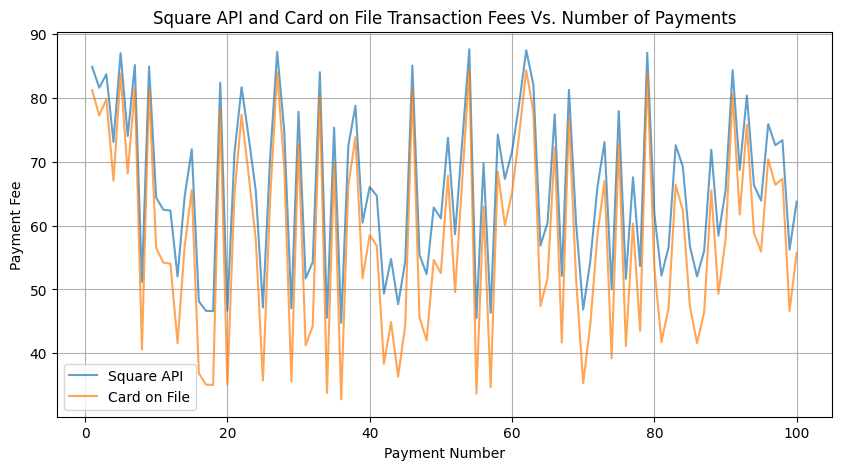

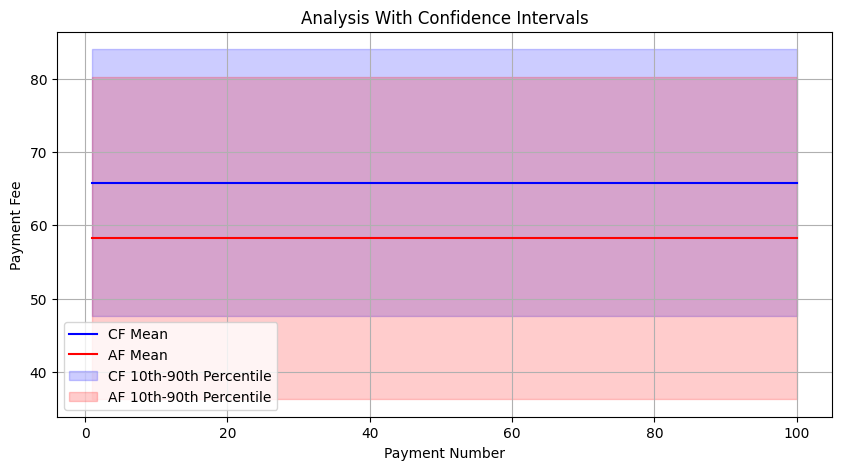

In [115]:
print(len(CF))
print(len(AF))
NUM_PAYMENTS = 100 # Reset the number of payments to 100 since we can't get to the desired 510

# Plot showing CF and Af against Number of payments
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, NUM_PAYMENTS + 1)  # X-axis values from 1 to 510

'''--------------------------------------------------------------------------'''
# Calculating statistics across all runs
CF_mean = np.mean(CF)
AF_mean = np.mean(AF)

CF_90th = np.percentile(CF, 90)
CF_10th = np.percentile(CF, 10)

AF_90th = np.percentile(AF, 90)
AF_10th = np.percentile(AF, 10)

# Creating arrays for visualization
CF_mean_array = np.full(NUM_PAYMENTS, CF_mean)
AF_mean_array = np.full(NUM_PAYMENTS, AF_mean)

CF_90th_array = np.full(NUM_PAYMENTS, CF_90th)
CF_10th_array = np.full(NUM_PAYMENTS, CF_10th)

AF_90th_array = np.full(NUM_PAYMENTS, AF_90th)
AF_10th_array = np.full(NUM_PAYMENTS, AF_10th)
'''--------------------------------------------------------------------------'''

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, CF, label="Square API", linestyle='-', marker='', alpha=0.7)
plt.plot(x, AF, label="Card on File", linestyle='-', marker='', alpha=0.7)
plt.xlabel("Payment Number")
plt.ylabel("Payment Fee")
plt.title("Square API and Card on File Transaction Fees Vs. Number of Payments")
plt.legend()
plt.grid(True)
plt.show()

# Plotting the mean lines
plt.figure(figsize=(10, 5))
plt.plot(x, CF_mean_array, label="CF Mean", linestyle='-', color='blue')
plt.plot(x, AF_mean_array, label="AF Mean", linestyle='-', color='red')

# Plotting the shaded error bands for percentiles
plt.fill_between(x, CF_10th_array, CF_90th_array, color='blue', alpha=0.2, label="CF 10th-90th Percentile")
plt.fill_between(x, AF_10th_array, AF_90th_array, color='red', alpha=0.2, label="AF 10th-90th Percentile")

plt.xlabel("Payment Number")
plt.ylabel("Payment Fee")
plt.title("Analysis With Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()



---

From the above figures we can see that overall Card on file costs less per transaction than Square API. Due to this, we concluded that the flatt fee offset added after the rate has a much larger effect on transaction fees than the percentage rate.

**There is a nice quote about Card on File we foun on Square Website:**

"*The higher fee for manually entered and card on file transactions is due to a greater risk involved with these payments, as neither the payment card nor the cardholder needs to be present for the payment to occur."*

=> Funny enough that given the risk involved it looks like the mercant is better off overall using Card on file than Square API. But overall this might not be worth the lawsuit losses they might face if any of these manually entered payment info was to go wrong....


---



## Congrats!

You're ready to start <i><u>Pay Up!</u></i> , your new fintech consultancy which specializes in creative payment processing and alternatives...

<br>

Payments are an important facet of fintech, but they're only one. Feel free to expand on this for a final project -- or take another path.


# &nbsp;